In [9]:
import numpy as np
from CADMium import Psgrid
from CADMium import Kohnsham

#Distance of the nucley from grid center
a =  1.0

#Nuclear charges on centers AB
Za  = 1
Zb = 0

#Set polaization. 1 Unpolarized, 2 Polarized
pol = 1

Nmo = [[1]]
N   = [[1]]

optKS = {
        "interaction_type" : "dft",
        "SYM" : False,
        "FRACTIONAL" : True,
        }

#Grid Options
NP = 10 #Number of points per block
NM =  [10,10] #Number of blocks [angular, radial]
L = np.arccosh(15./a) #Maximum radial coordinate value
loc = np.array(range(-4,5)) #Non inclusive on upper bound

#Create and initialize grid object
grid = Psgrid(NP, NM, a, L, loc)
grid.initialize()

#Kohn Sham object
KS = Kohnsham(grid, Za, Zb, pol, Nmo, N, optKS)
KS.scf(optKS)

print(f" Total Energy: {KS.E.E}")

 Constructing integration weights ... 

 Building finite difference opperators ... 

 Factorizing Laplacian ... 

 Done
 iter    Total Energy     HOMO Eigenvalue         Res       

----------------------------------------------------------- 

   1         -0.489          -0.211            1.0
   2         -0.463          -0.225            0.05631287276837016
   3         -0.452          -0.230            0.02302605573285911
   4         -0.448          -0.232            0.00915607319192205
   5         -0.447          -0.233            0.003608915779883818
   6         -0.446          -0.233            0.001411410758763489
   7         -0.446          -0.233            0.0005506063273116313
   8         -0.446          -0.233            0.00021310442351815922
   9         -0.446          -0.233            8.16926095865287e-05
   10         -0.446          -0.233            3.0915923701692905e-05
   11         -0.446          -0.233            1.148837382973195e-05
   12         -0.446

In [10]:
#Visualize components
import matplotlib.pyplot as plt

vext,x,y = grid.plotter(KS.vext)
vh,_,_ = grid.plotter(KS.V.vh)
vxc,_,_ = grid.plotter(KS.V.vx + KS.V.vc)

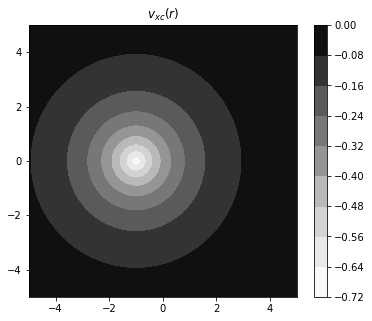

In [11]:
fig = plt.figure(figsize=(6,5))

plt.xlim(-5,5)
plt.ylim(-5,5)

plt.title("$v_{xc}(r)$")

plt.contourf(x,y,vxc, 
             levels=10,
             cmap="Greys",
             antialiased = False,
             linestyles = "dotted",
            )

plt.colorbar()
plt.show()

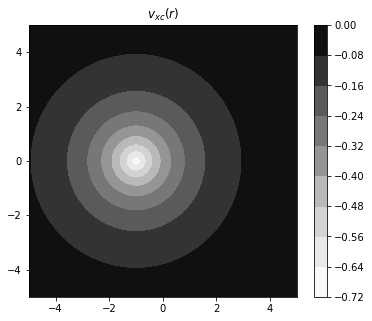

In [12]:
fig = plt.figure(figsize=(6,5))

plt.xlim(-5,5)
plt.ylim(-5,5)

plt.title("$v_{xc}(r)$")

plt.contourf(x,y,vxc, 
             levels=10,
             cmap="Greys",
             antialiased = False,
             linestyles = "dotted",
            )

plt.colorbar()
plt.show()

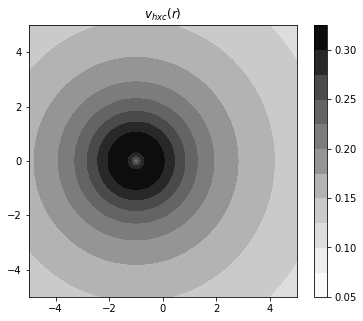

In [13]:
fig = plt.figure(figsize=(6,5))

plt.xlim(-5,5)
plt.ylim(-5,5)

plt.title("$v_{hxc}(r)$")

plt.contourf(x,y,vxc + vh, 
             levels=10,
             cmap="Greys",
             antialiased = False,
             linestyles = "dotted",
            )

plt.colorbar()
plt.show()

In [15]:
#Extract components along the z axis
x, v_hartree = grid.axis_plot(KS.V.vh)
_, v_xc      = grid.axis_plot(KS.V.vx + KS.V.vc)

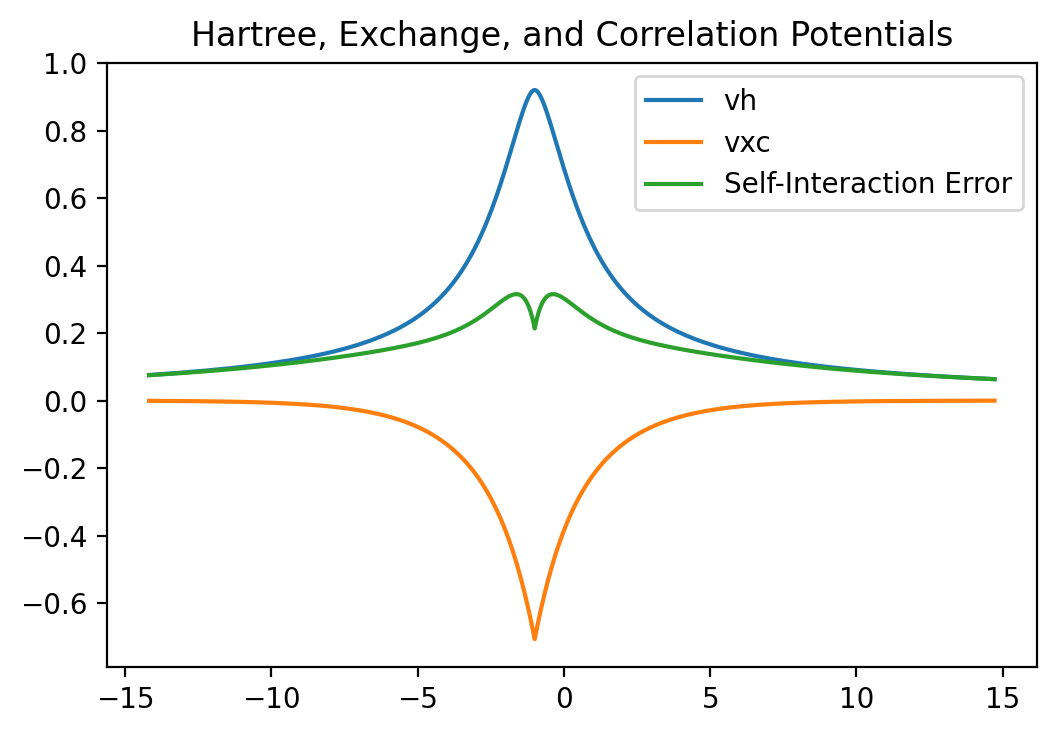

In [17]:
fig = plt.figure(dpi=200)

plt.title("Hartree, Exchange, and Correlation Potentials") 

plt.plot(x, v_hartree, label="vh")
plt.plot(x, v_xc, label="vxc")
plt.plot(x, v_hartree + v_xc, label="Self-Interaction Error")


plt.legend()
plt.show()